### Gráfico de los dos cruces de la barrera phantom (Figura 3.1 del TdT)
- V. Silva

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

wa = 5.203
wb = 0.188
wc = 3.634

a0 = 1.0

In [2]:
def w_de(a):
    arg = a / a0
    return wa * arg * np.cos(arg) - wb * arg * np.cosh(arg) - wc

def z_to_a(z):
    # redshift a factor de escaala
    return 1.0 / (1.0 + z)

def a_to_z(a):
    # al revés
    return (1.0 / a) - 1.0

In [3]:
def phantom_crossing_equation(a):
    return w_de(a) + 1.0

# buscamos primer cruce a 0.4
a_cross1_guess = z_to_a(0.4)
a_cross1 = fsolve(phantom_crossing_equation, a_cross1_guess)[0]
z_cross1 = a_to_z(a_cross1)

# buscamos segundo cruce a 0.1
a_cross2_guess = z_to_a(0.1)
a_cross2 = fsolve(phantom_crossing_equation, a_cross2_guess)[0]
z_cross2 = a_to_z(a_cross2)

In [4]:
z_values = np.linspace(2.0, -0.5, 2000)
a_values = z_to_a(z_values)
w_values = w_de(a_values)

z_now = 0.0
w_now = w_de(1.0)

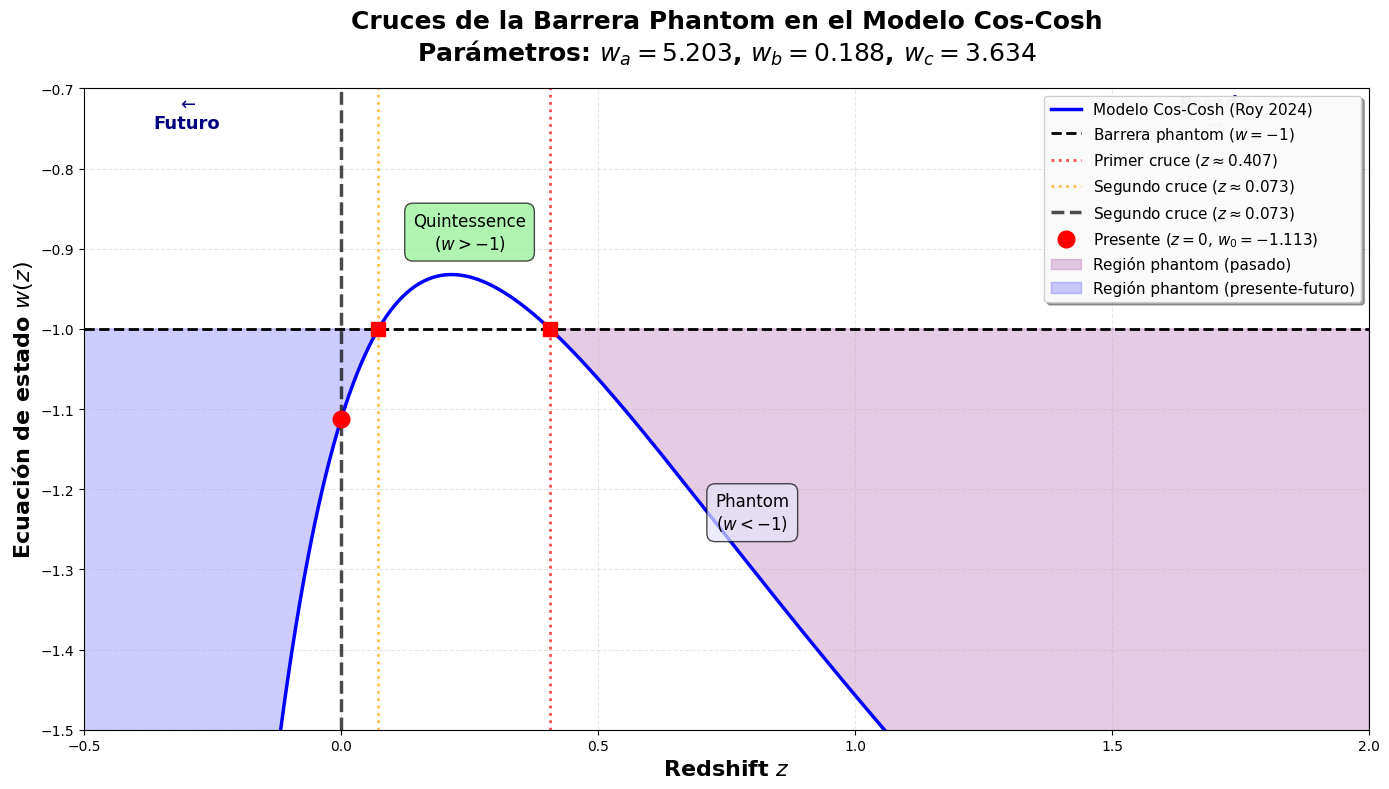

In [7]:
fig, ax = plt.subplots(figsize=(14, 8))

# graficar w(z)
ax.plot(z_values, w_values, 'b-', linewidth=2.5, label='Modelo Cos-Cosh (Roy 2024)')

# línea de barrera phantom w = -1
ax.axhline(y=-1.0, color='black', linestyle='--', linewidth=2,
           label='Barrera phantom ($w = -1$)', zorder=2)

# los cruces phantom
ax.axvline(x=z_cross1, color='red', linestyle=':', linewidth=2, alpha=0.7,
           label=f'Primer cruce ($z \\approx {z_cross1:.3f}$)')
ax.axvline(x=z_cross2, color='orange', linestyle=':', linewidth=2, alpha=0.7,
           label=f'Segundo cruce ($z \\approx {z_cross2:.3f}$)')
ax.axvline(x=0, color='black', linestyle='--', linewidth=2.5, alpha=0.7,
           label=f'Segundo cruce ($z \\approx {z_cross2:.3f}$)')
# punto actual
ax.plot(z_now, w_now, 'ro', markersize=12, label=f'Presente ($z=0$, $w_0={w_now:.3f}$)',
        zorder=5)

# puntos de cruce
ax.plot(z_cross1, -1.0, 'rs', markersize=10, zorder=4)
ax.plot(z_cross2, -1.0, 'rs', markersize=10, zorder=4)

# regiones phantom
z_phantom_past = z_values[z_values > z_cross1]
w_phantom_past = w_values[z_values > z_cross1]
mask_past = w_phantom_past < -1
ax.fill_between(z_phantom_past[mask_past], w_phantom_past[mask_past], -1,
                alpha=0.2, color='purple', label='Región phantom (pasado)')

z_phantom_present = z_values[(z_values < z_cross2) & (z_values >= -0.5)]
w_phantom_present = w_values[(z_values < z_cross2) & (z_values >= -0.5)]
ax.fill_between(z_phantom_present, w_phantom_present, -1,
                alpha=0.2, color='blue', label='Región phantom (presente-futuro)')

# ejes
ax.set_xlabel('Redshift $z$', fontsize=16, fontweight='bold')
ax.set_ylabel('Ecuación de estado $w(z)$', fontsize=16, fontweight='bold')
ax.set_title('Cruces de la Barrera Phantom en el Modelo Cos-Cosh\n' +
             f'Parámetros: $w_a={wa}$, $w_b={wb}$, $w_c={wc}$',
             fontsize=18, fontweight='bold', pad=20)

ax.set_xlim(-0.5, 2.0)
ax.set_ylim(-1.5, -0.7)

ax.grid(True, alpha=0.3, linestyle='--')

ax.legend(loc='upper right', fontsize=11, framealpha=0.95, shadow=True)

ax.annotate('Quintessence\n($w > -1$)',
            xy=(0.25, -0.9), fontsize=12, ha='center',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.7))

ax.annotate('Phantom\n($w < -1$)',
            xy=(0.8, -1.25), fontsize=12, ha='center',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lavender', alpha=0.7))

ax.annotate('$\\leftarrow$\nFuturo',
            xy=(-0.3, -0.75), fontsize=13, ha='center', fontweight='bold',
            color='navy')

ax.annotate('Pasado\n$\\rightarrow$',
            xy=(1.7, -0.75), fontsize=13, ha='center', fontweight='bold',
            color='navy')

plt.tight_layout()

# guardar figura
#plt.savefig('/mnt/user-data/outputs/cruces_phantom_modelo_coscosh.png',
#            dpi=300, bbox_inches='tight')

plt.show()